In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import random

from petl import fromcsv, look, fieldnames, values, head, tail

import seaborn as sns

from mpl_toolkits.basemap import Basemap

import os

from datetime import datetime

import nltk

In [5]:
file_names = ['data_sample0000_part_00.txt', 'data_sample0001_part_00.txt', 
              'data_sample0002_part_00.txt','data_sample0003_part_00.txt',
              'data_sample0004_part_00.txt','data_sample0005_part_00.txt']

files_path = 'datasample/'

with open('datasample/concatenated_dataset.txt', 'w') as conc_file:
    for file_name in file_names:
        with open(files_path + file_name) as input_file:
            conc_file.write(input_file.read())


data = pd.read_csv('datasample/concatenated_dataset.txt', sep="|", header = None)

data.columns = ['getsocial_user_id', 'gramble_sdk_version', 'app_id', 'app_version',
                'ts', 'duration', '_type', 'country', 'city', 'os', 'os_version', 
                'model', 'wifi', 'screen_width', 'screen_height', 'screen_dpi'] 

Fields included in the original dataset:

1. getsocial_user_id
2. gramble_sdk_version
3. app_id
4. app_version
5. ts
6. duration
7. _type
8. country
9. city
10. os
11. os_version
12. model
13. wifi
14. screen_width
15. screen_height
16. screen_dpi 



In [6]:
data.head(n=1)

,getsocial_user_id,gramble_sdk_version,app_id,app_version,ts,duration,_type,country,city,os,os_version,model,wifi,screen_width,screen_height,screen_dpi
0,6663064022923095307,5.0.0,5484472399742369849,5.0.0 (1),2016-02-23 10:20:14,1.0,content_session,US,Ashburn,Android,5.0,Google Nexus 6 - 5.0.0 - API 21 - 1440x2560,t,1440.0,2392.0,560.0


New Fiels derived from dataset:

1. year
2. month
3. day
4. hour

In [7]:
time_date = pd.DatetimeIndex(data['ts'])
data['year'] = time_date.year
data['month'] = time_date.month
data['dayofweek'] = time_date.dayofweek
data['day'] = time_date.day
data['hour'] = time_date.hour

# How many events occurred per month?

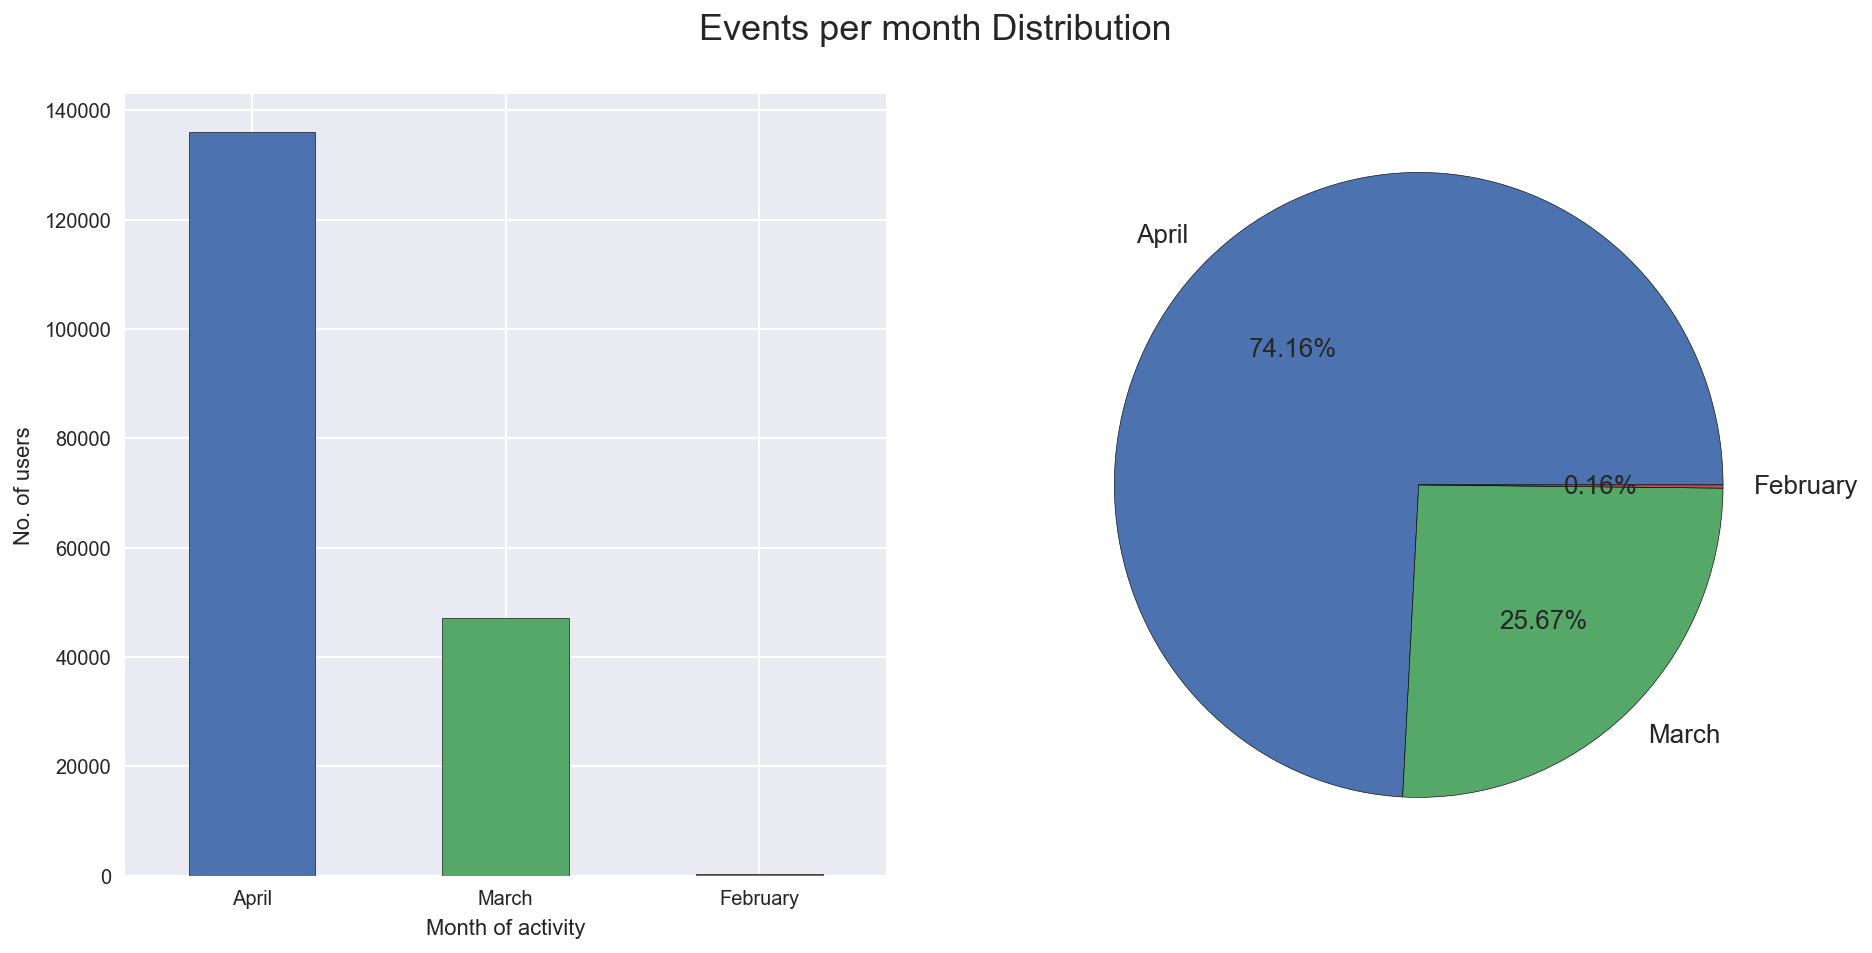

In [8]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Events per month Distribution", fontsize = 18.)
_ = data.month.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2])).set(xticklabels = ["April", "March","February"])
_ = data.month.value_counts().plot.pie(labels = ("April", "March","February"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],)
_ = ax[0].set_xlabel("Month of activity"), ax[0].set_ylabel("No. of users")

March is the most popular month with over 130K of occurrences (~75% of total events)

## Which is the day with the most number of events?



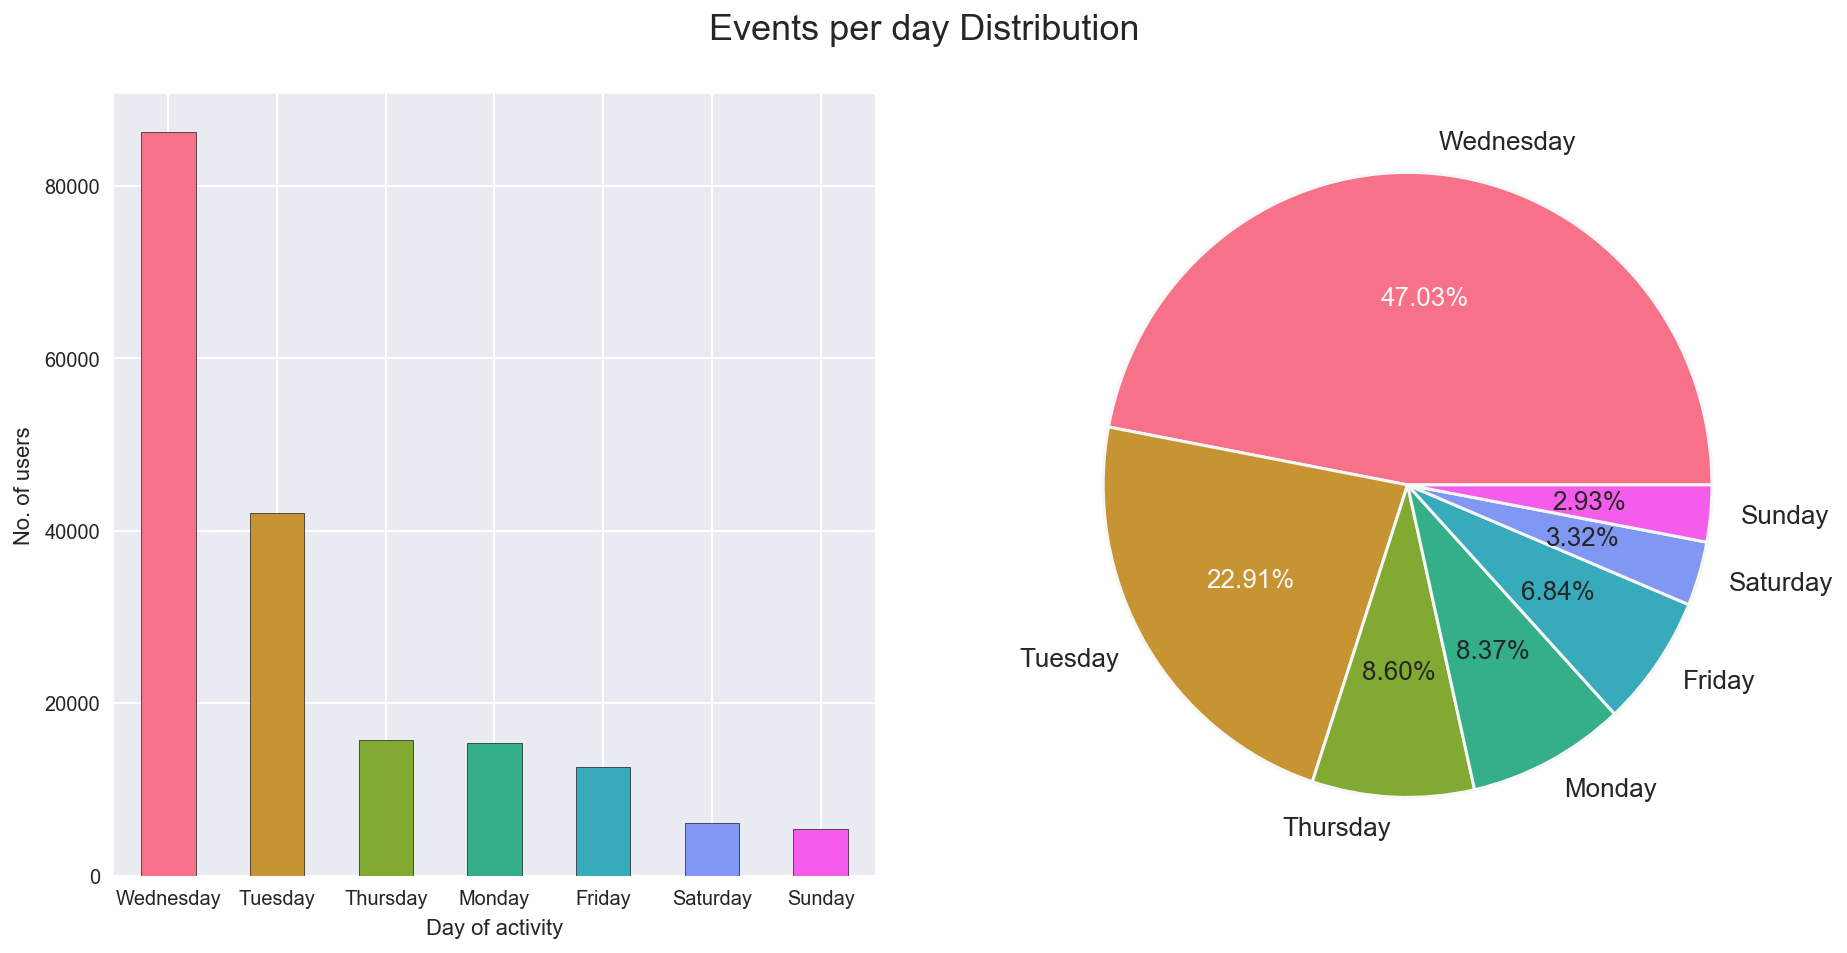

In [9]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Events per day Distribution", fontsize = 18.)
_ = data.dayofweek.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette("husl",7))).set(xticklabels = ["Wednesday", "Tuesday","Thursday","Monday","Friday","Saturday","Sunday"])
_ = data.dayofweek.value_counts().plot.pie(labels = ("Wednesday", "Tuesday","Thursday","Monday","Friday","Saturday","Sunday"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
                                         colors = (sns.color_palette("husl",7)), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")
_ = ax[0].set_xlabel("Day of activity"), ax[0].set_ylabel("No. of users")

Monday and Tuesday seems to be the preferred days for the users (~70% of the events occurred within these days)

## How about the preferred hours within the users?

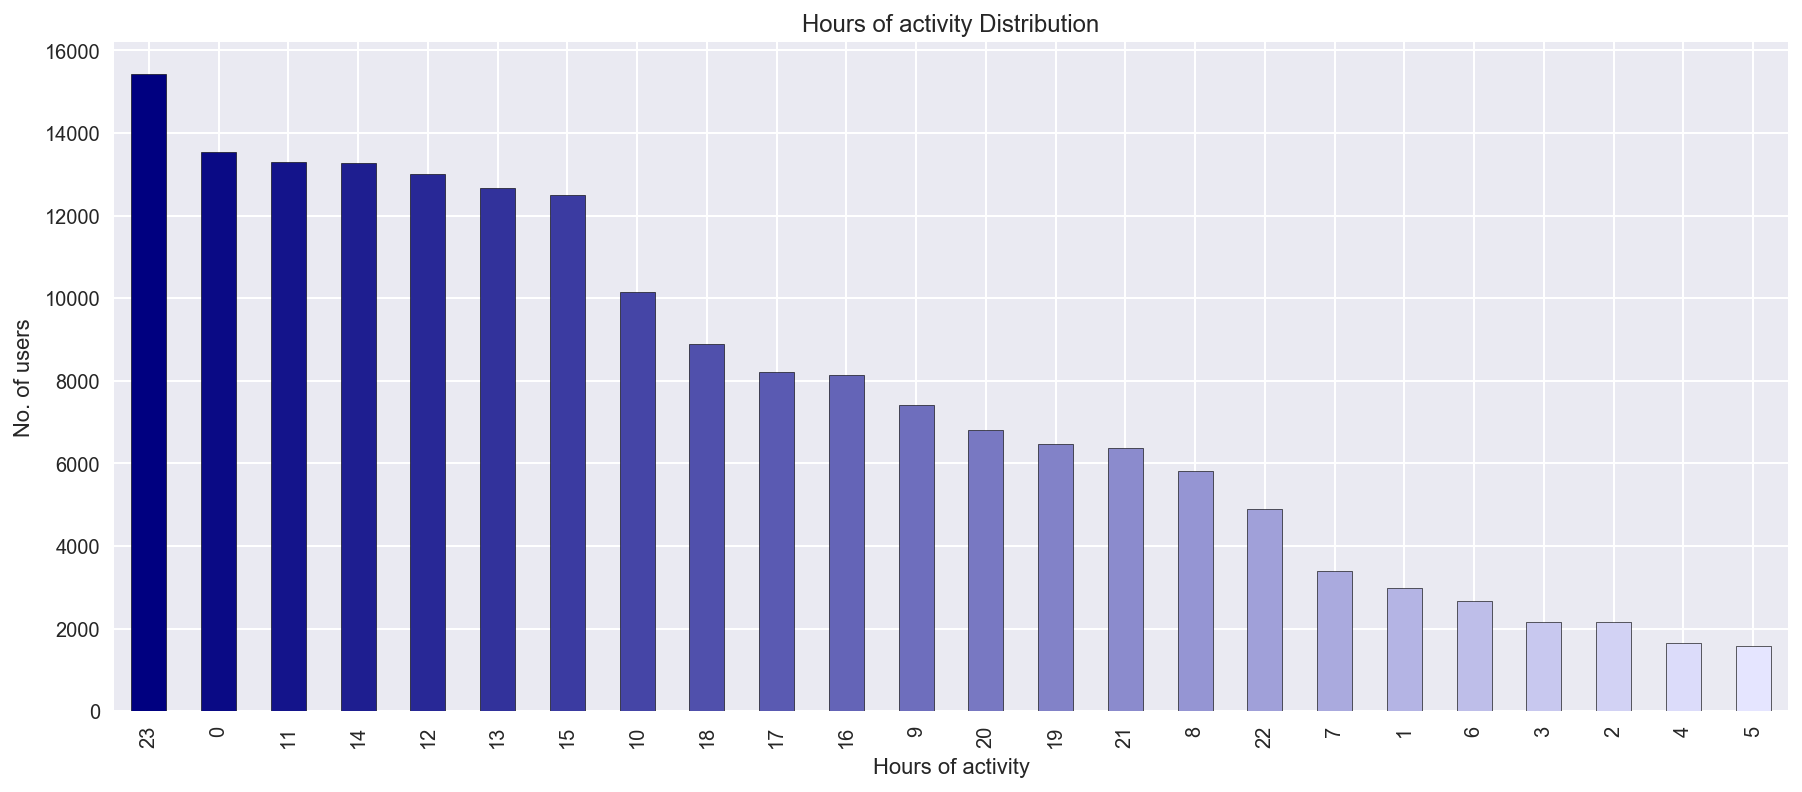

In [10]:
p = data.hour.value_counts().plot.bar(figsize = (15, 6),color = (sns.light_palette("navy",24, reverse=True)), title="Hours of activity Distribution")
_ = p.set_xlabel("Hours of activity"), p.set_ylabel("No. of users")

Two important tendencies:
    - From 23hrs to 24hrs
    - From 11hrs to 15hrs 

## From which countries are the users?

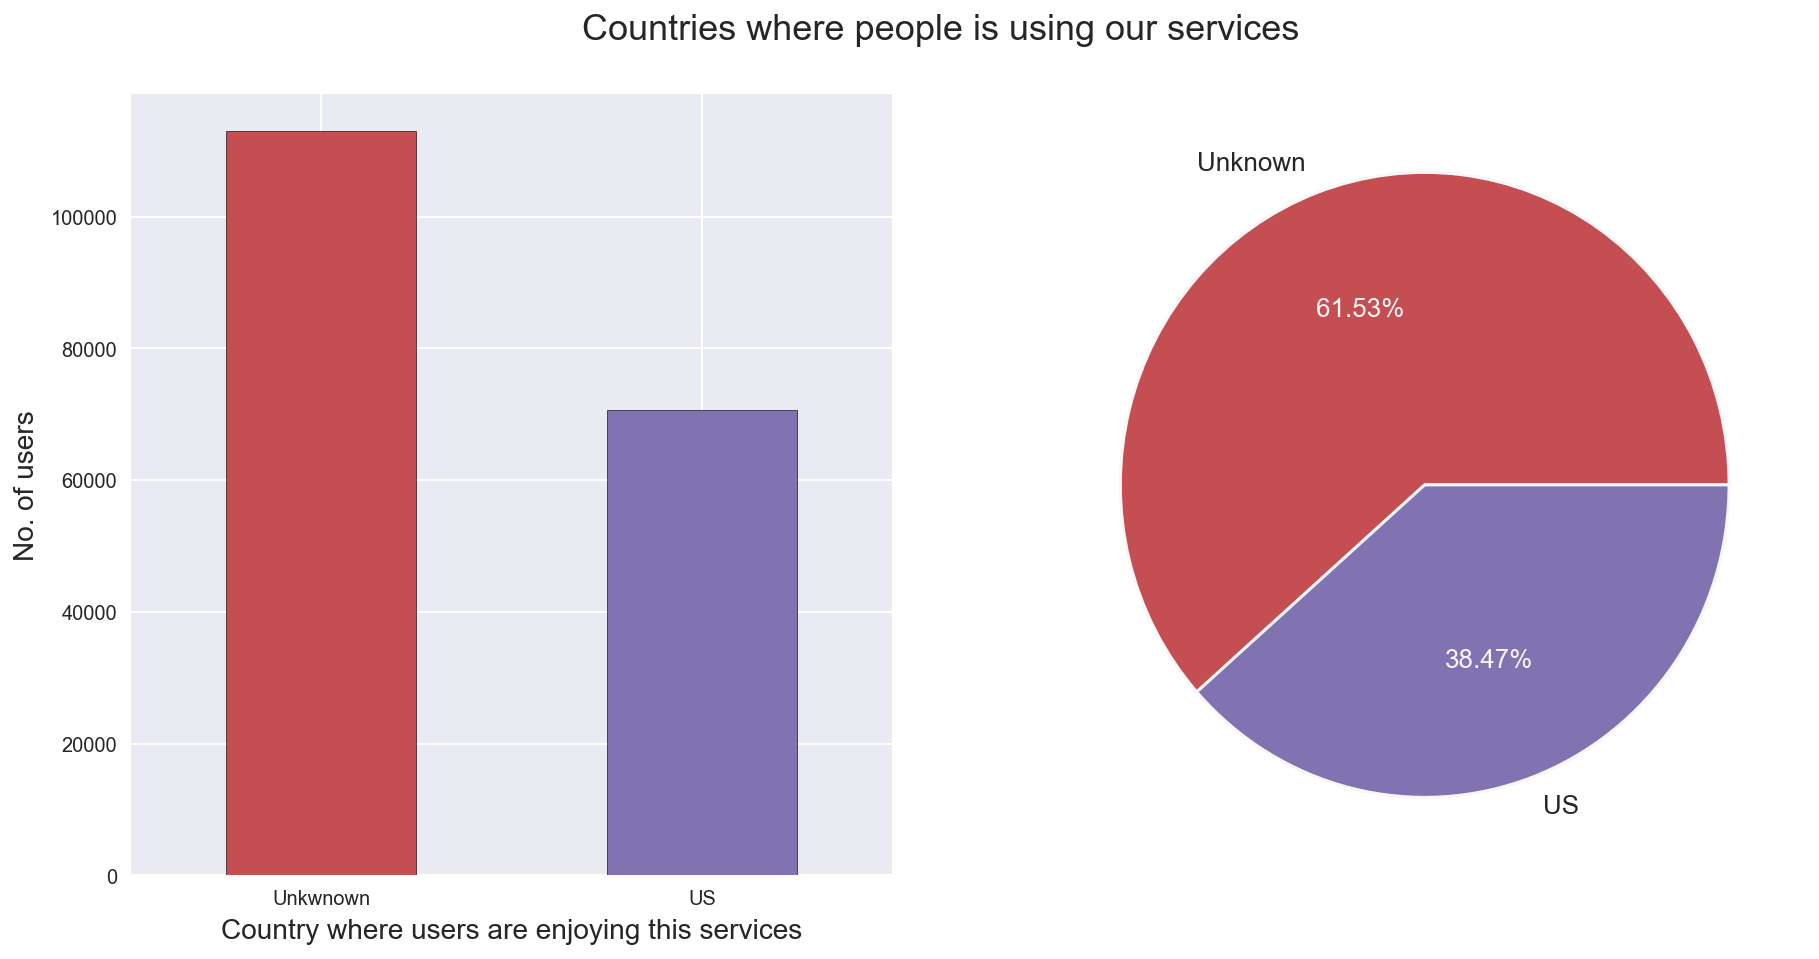

In [11]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Countries where people is using our services", fontsize = 18.)
_ = data.country.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[2],sns.color_palette()[3])).set(xticklabels=["Unkwnown","US"])
_ = data.country.value_counts().plot.pie(labels = ("Unknown","US","fd"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
                                         colors = (sns.color_palette()[2], sns.color_palette()[3]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")
_ = ax[0].set_xlabel("Country where users are enjoying this services").set(fontsize = 14.), ax[0].set_ylabel("No. of users").set(fontsize = 14.)

Seems that we have a problem... We know an ~38.5% of users come from the US. However, we don't which is the country of most of the users! 

## What are the OS used in the events?

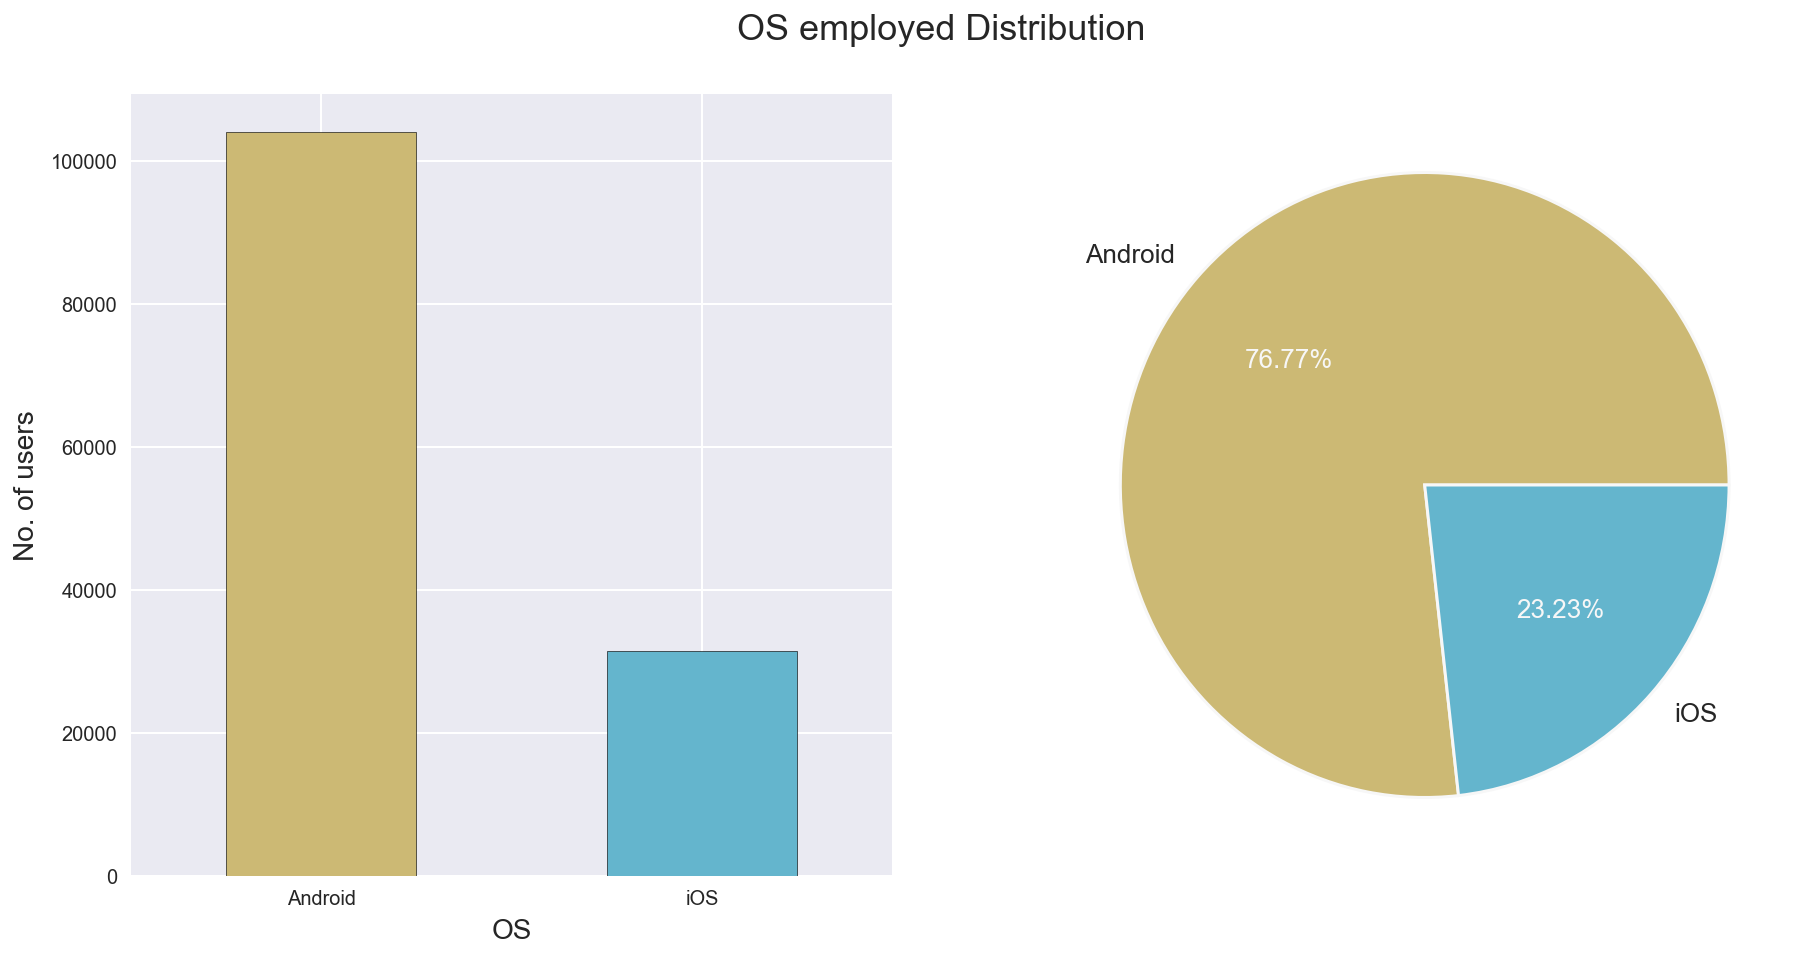

In [12]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("OS employed Distribution", fontsize = 18.)
_ = data.os.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[4],sns.color_palette()[5])).set(xticklabels=["Android","iOS"])
_ = data.os.value_counts().plot.pie(labels = ("Android","iOS"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
                                         colors = (sns.color_palette()[4], sns.color_palette()[5]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")
_ = ax[0].set_xlabel("OS").set(fontsize = 14.), ax[0].set_ylabel("No. of users").set(fontsize = 14.)

# Is the app ID somehow provinding relevant information to us?

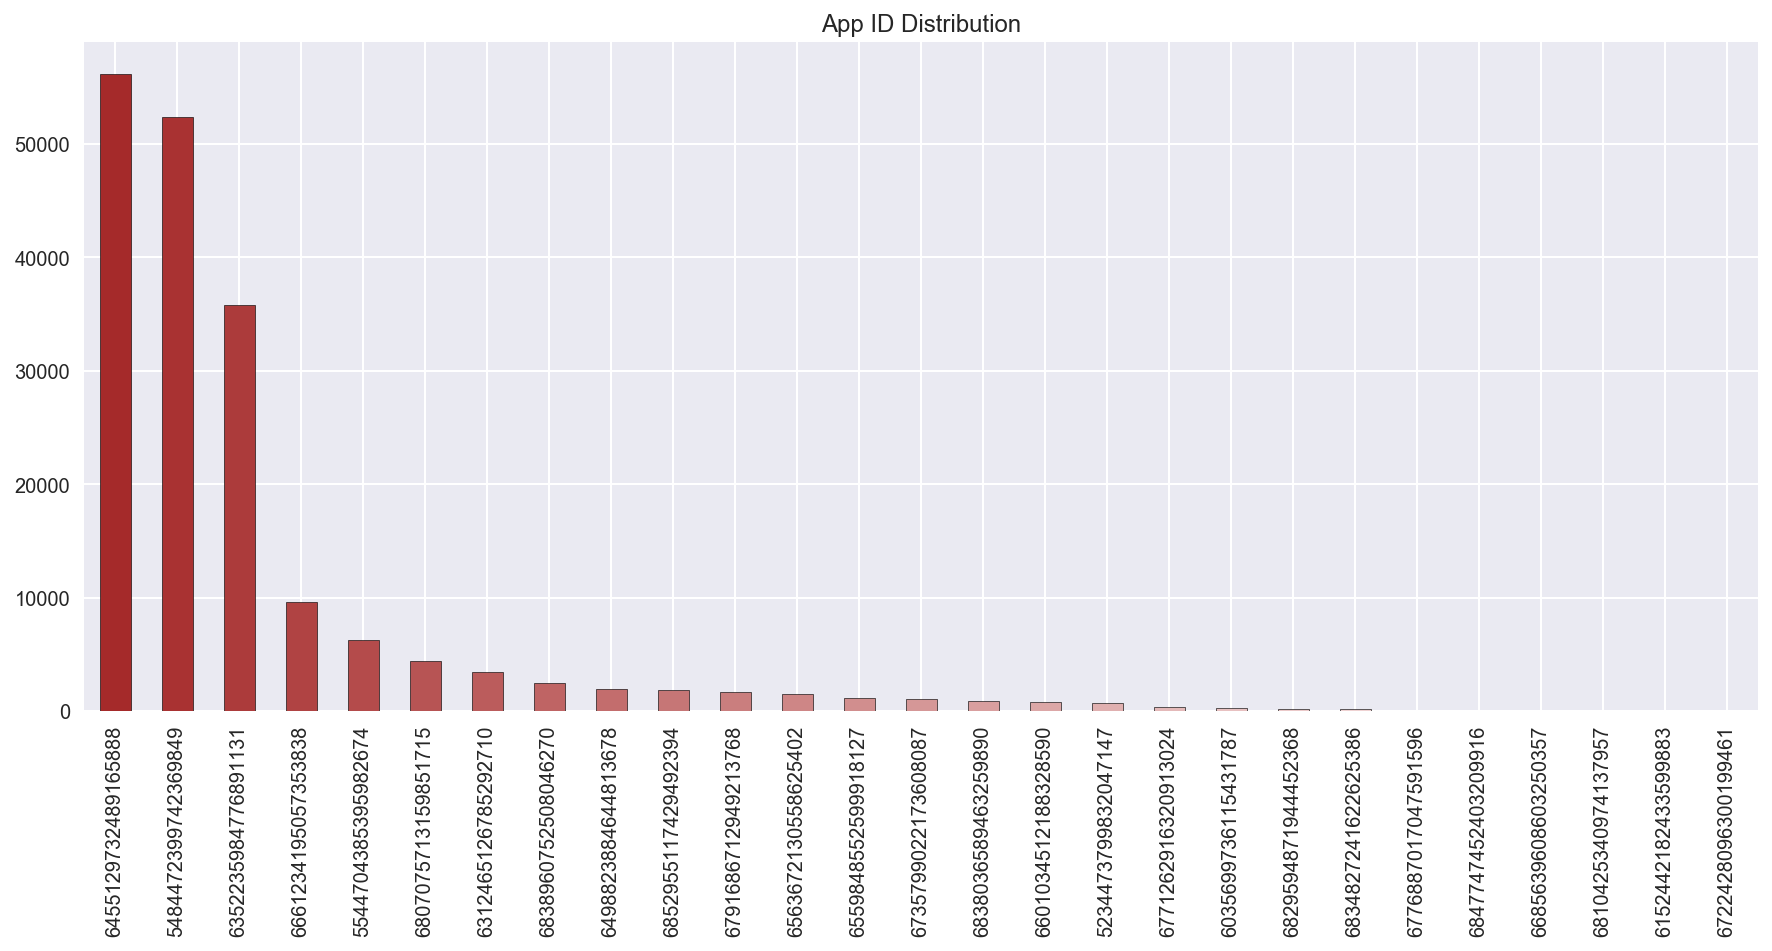

In [13]:
p = data.app_id.value_counts().plot.bar(figsize = (15, 6),color = (sns.light_palette("brown",24, reverse=True)), title="App ID Distribution")

It's noticeable between 3 to 4 apps are getting a lot of interest in people.

# What type of activites are the users making when connecting to Get Social?

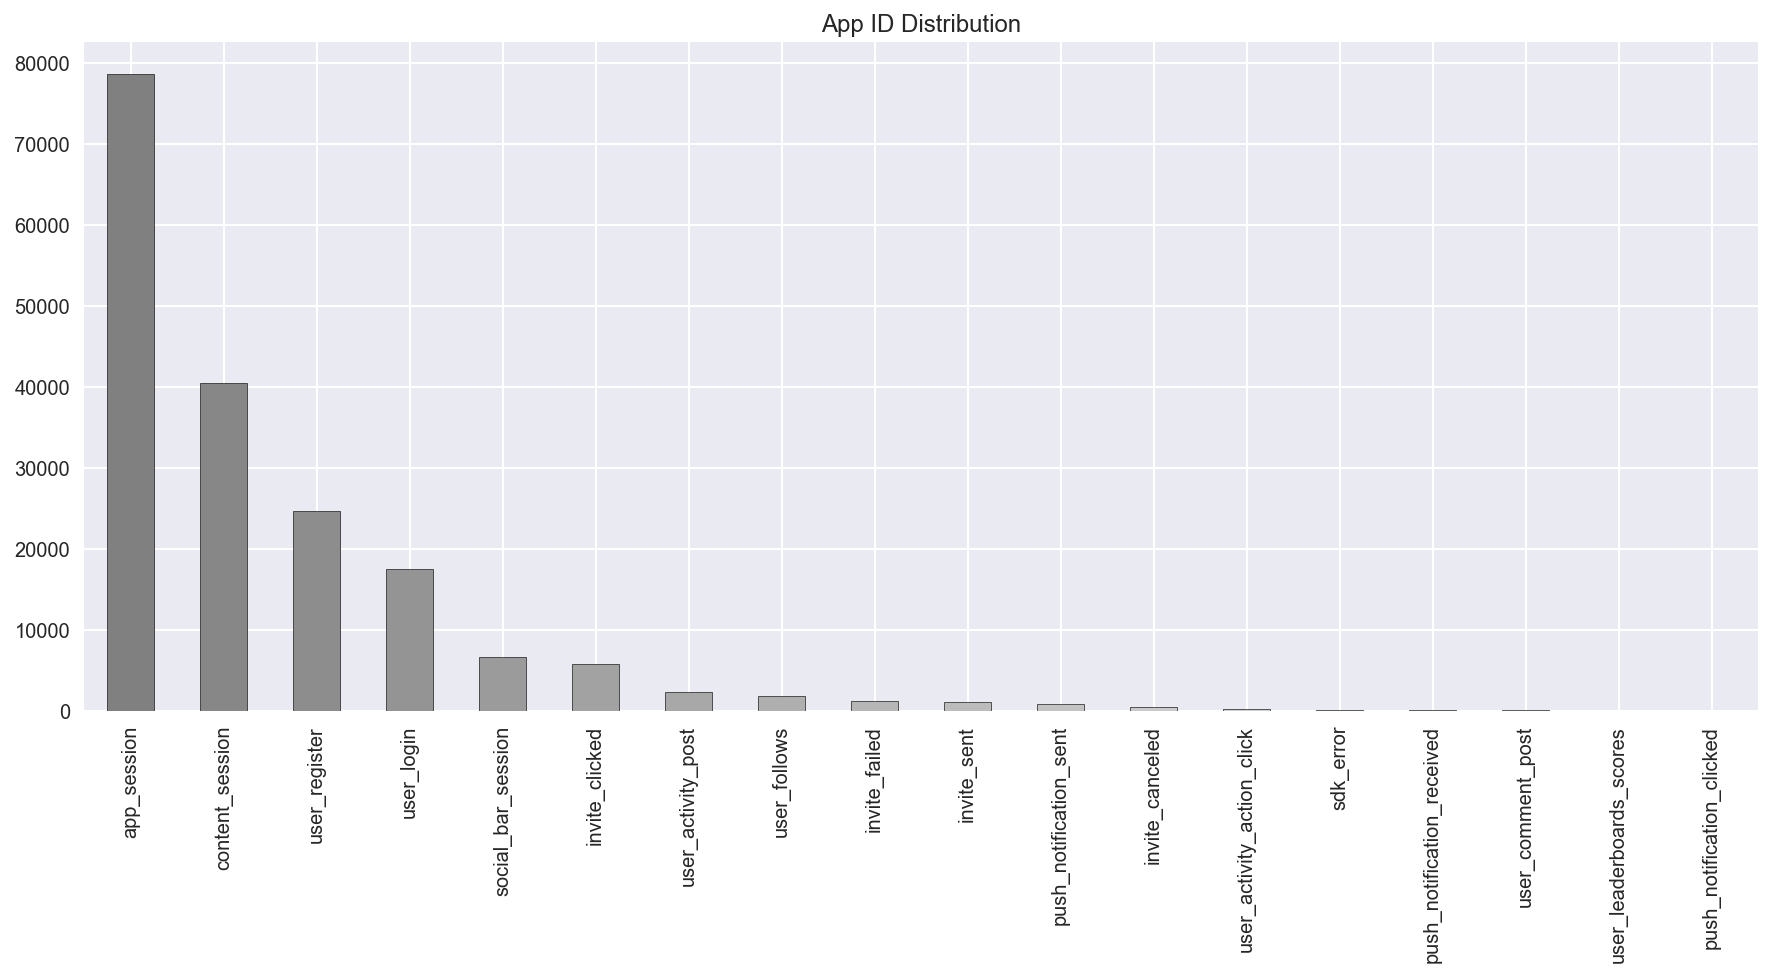

In [14]:
#s = data['model'].str.split(' ').to_frame()
p = data._type.value_counts().plot.bar(figsize = (15, 6),color = (sns.light_palette("gray",18, reverse=True)), title="App ID Distribution")

App_session, content_session and user_register are the most important among the possible activites.

# Is there any relationship between screen width and screen height among users?

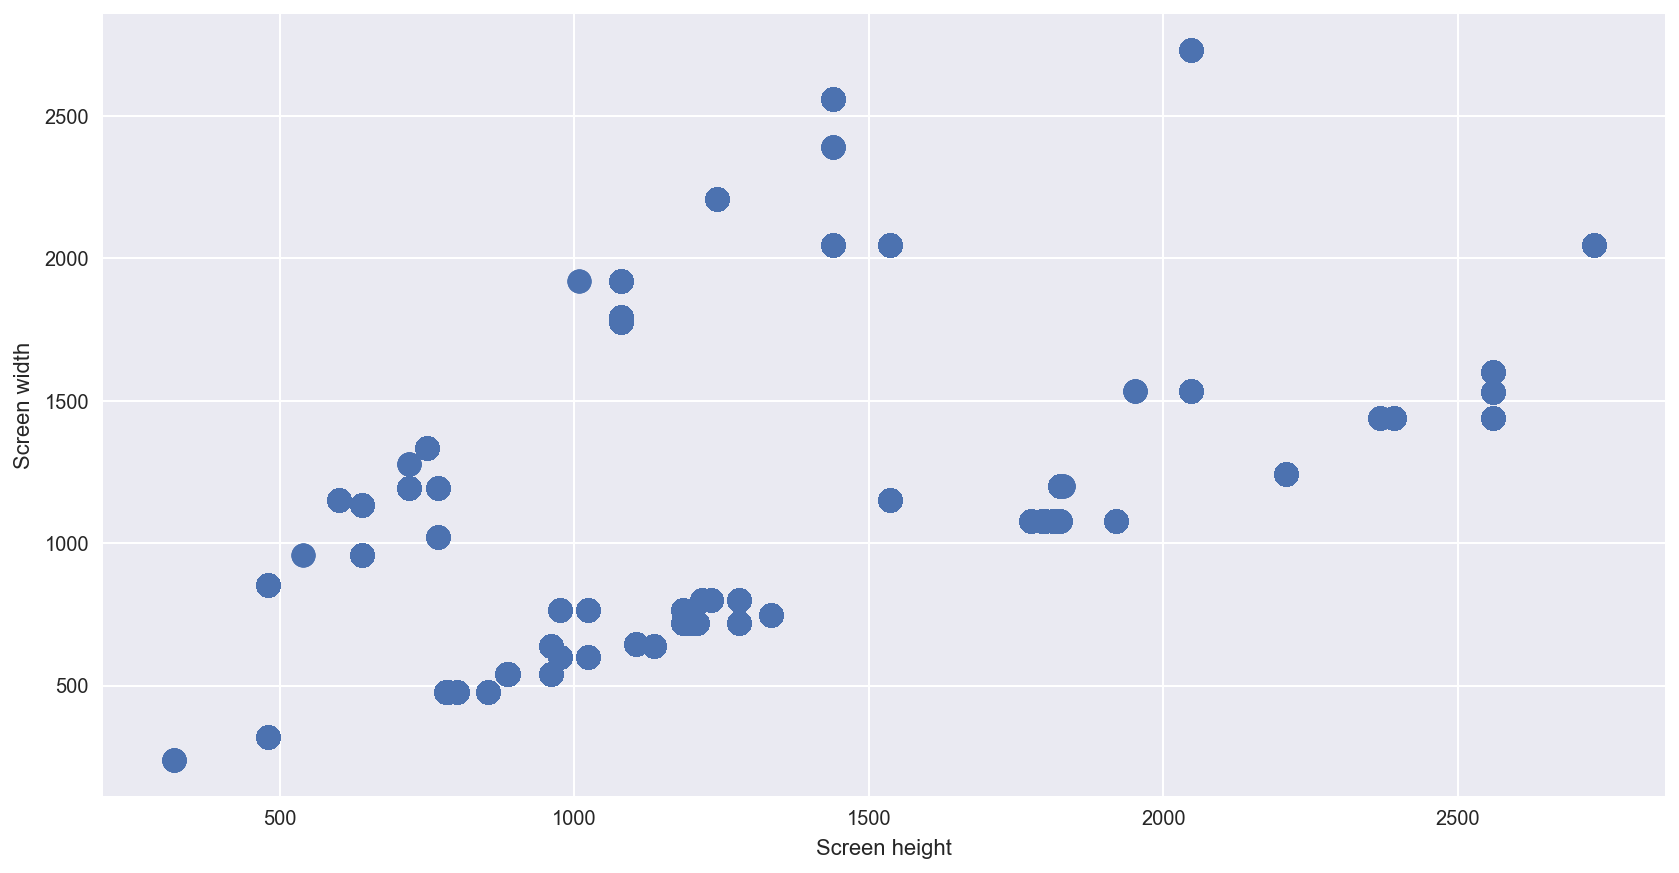

In [15]:
 #battles.dropna(axis = 0, subset = [["screen_width", "screen_height", ]]).copy(deep = True)
p = data.plot(kind = "scatter", x = "screen_height",  y = "screen_width", figsize = (14, 7),s = 100, lw = 2.)
_ = p.set_xlabel("Screen height"), p.set_ylabel("Screen width")


Based on the scatter the mean is close to 1500px. Nevertheless, it seems that there's more preference for small screens, by which it's very likely that mobiles are the main device used by users. 
Let's have a deeper analisys of the dpi and the height and width screen fields separately.

# What is the typical dpi preferred by users?

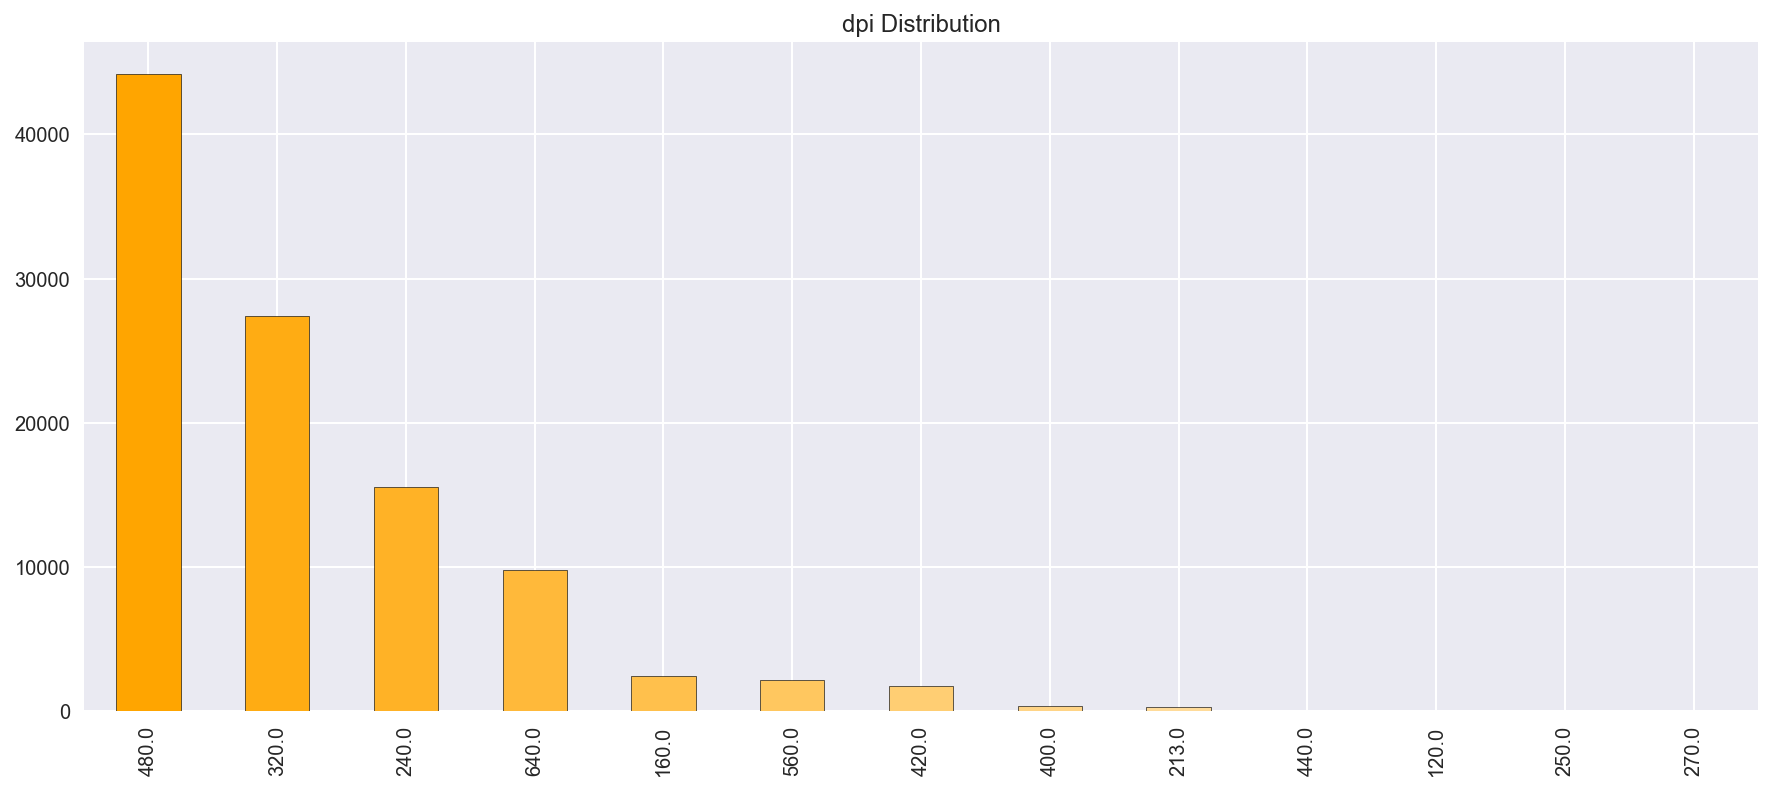

In [16]:
p = data.screen_dpi.value_counts().plot.bar(figsize = (15, 6), color = (sns.light_palette("orange",13, reverse=True)), title="dpi Distribution")

 Ok, 480 dpi followed by 320 dpi are the top values. 

# Conclusions.

After this brief analysis there're some findings that can help us to perform interesting analysis and predictions. The most relevant findings are:

1. Being april the most popular month. The important question is: What did Get Social make in April to have such an important growing? it might be beneficial to have a deeper analyisis of aspects like campaings or decisions taken to catch the eye of users, so that it can continue promoting and growing the joining of new users within the market.

2. Wednesdays before midnight turned to be the ideal time for users to interact with the app. In adition, from midday to 15hrs was the longest period of time where users were participating in some activity related to the services of the company. Is the company really taking advantage of this traffic preferences?

3. Android is the most common manner to get connected for the events contained in the dataset. An important question to answer is: What is the relationship betweein the os and the model fields in the data? Perhaps it can help us to understand the kind of people we are attracting to. According to our simplistic analyisis 23% of users have an iOs system, this means a high spech mobile might be in use even for the Android users when using the services of the company. If this is the case, it can help on delimiting our products, enhancing our marketing campaings and making more informed decisions which will be beneficial for enhancing our participation with our current costumers as well as with engaging new future costumers.

4. App_session and Content_session are the most important activities done by the users. Due to we have few information about these activities so far, it's clear some further detailed analysis of this field would be useful to get some relevant knowledge in the future.

5. The US market is so far the biggest customer for the company. With more reliable knowledge of the unknown origin of most of the costumers, the accuracy of our predictions would grow dramatically. How to prevent this problematic in the future? Maybe one option would be by acquiring geographic coordinates, which would be possible if we are able to devise a geospatial application that enhance the infrastructure of the company and develop a more precise analysis of the behaviour of the users of get social and a more reliable collection of data.